In [156]:
import pandas as pd
import matplotlib.pyplot as plt 


### show downloaded files

In [95]:
import os
arr = os.listdir('data')
arr

['14_bevoelkerungsvorausberechnung_daten.csv',
 'Sterberate 2016_2022 Tage.xlsx',
 'Sterberate pro Altersgruppe 2000-2016.xlsx',
 'Sterberate pro Altersgruppe 2016-2022.xlsx',
 '~$Sterberate 2016_2022 Tage.xlsx']

In [84]:
bevoelkerungsvorausberechnung_df = pd.read_csv("data/14_bevoelkerungsvorausberechnung_daten.csv",delimiter=';')

In [85]:
cols = bevoelkerungsvorausberechnung_df.columns
bevoelkerungsvorausberechnung_df[cols[0:5]].loc[(bevoelkerungsvorausberechnung_df['Simulationsjahr'] < 2022) & (bevoelkerungsvorausberechnung_df['Simulationsjahr'] > 2010)]

,Variante,Simulationsjahr,mw,Bev,Bev_0_1
122,0,2011,m,39230,337
123,0,2011,w,41098,321
124,0,2012,m,39377,346
125,0,2012,w,41120,328
126,0,2013,m,39557,350
...,...,...,...,...,...
2323,27,2019,w,42145,384
2324,27,2020,m,41176,403
2325,27,2020,w,42232,383
2326,27,2021,m,41272,401


## Sterberate pro Altersgruppe 2016-2022

In [86]:
sterberate_16_22 = pd.read_excel('data/Sterberate pro Altersgruppe 2016-2022.xlsx','D_2016_2022_Tage')

In [87]:
sterberate_16_22.rename(columns = {'Stand: 02.05.2022':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)
df_16_22 = sterberate_16_22[['year','Insgesamt']][9:].sort_values('year')

## Sterberate pro Altersgruppe 2000-2016

In [88]:
sterberate_00_16 = pd.read_excel('data/Sterberate pro Altersgruppe 2000-2016.xlsx','D_2000_2015_Tage')

In [89]:
sterberate_00_16.rename(columns = {'Unnamed: 0':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)

In [90]:
df_00_16 = sterberate_00_16[['year','Insgesamt']][9:].sort_values('year')

In [91]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([df_00_16, df_16_22], axis=0)

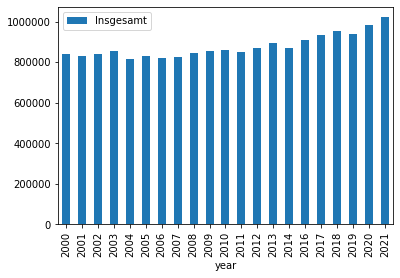

In [93]:
vertical_stack.plot(x='year',y='Insgesamt',kind='bar')

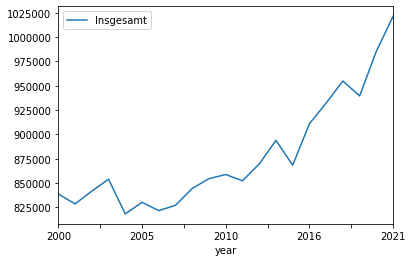

In [196]:
vertical_stack.plot(x='year',y='Insgesamt',kind='line')

# Tägliche Sterberate

In [141]:
sterberate_2000_2022_tag = pd.read_excel('data/Sterberate 2000_2022_tage.xlsx','Sheet2')

In [166]:
cols = sterberate_2000_2022_tag.columns

In [143]:
cols[1:]

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

In [165]:
sterberate_2000_2022_tag[cols[1:]] = sterberate_2000_2022_tag[cols[1:]].apply(pd.to_numeric)

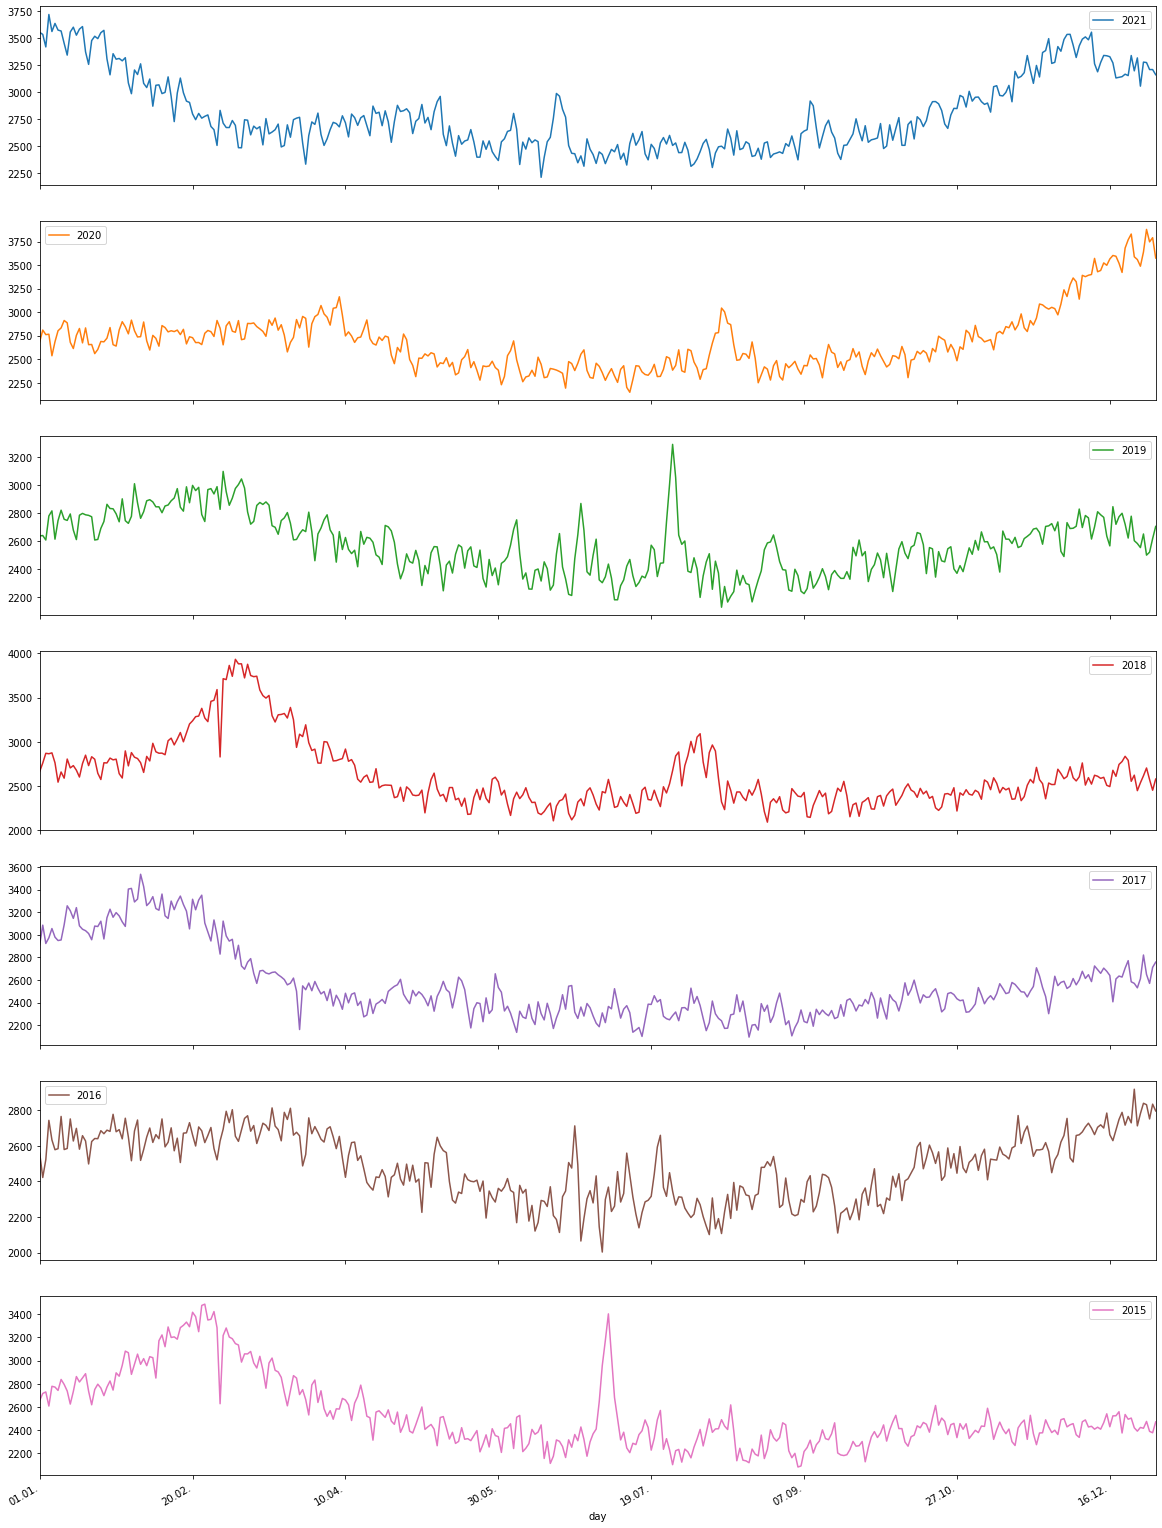

In [198]:
sterberate_2000_2022_tag[:-1].plot(x='day',y=cols[2:-15],kind='line',figsize=(20, 30), subplots=True)
print('')

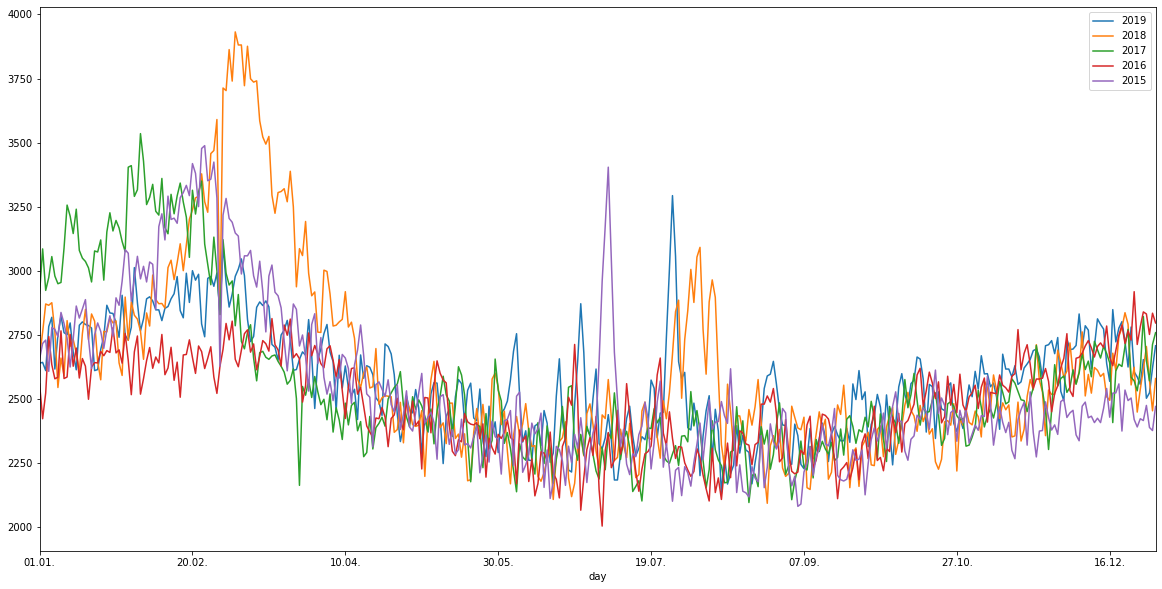

In [195]:
sterberate_2000_2022_tag[:-1].plot(x='day',y=cols[4:-15],kind='line',figsize=(20, 10), subplots=False)
print('')